# 🏡 Housing Price Prediction using Machine Learning

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

In [3]:
data = pd.read_csv("housing.csv")

In [4]:
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [10]:
data.dropna(inplace=True)

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

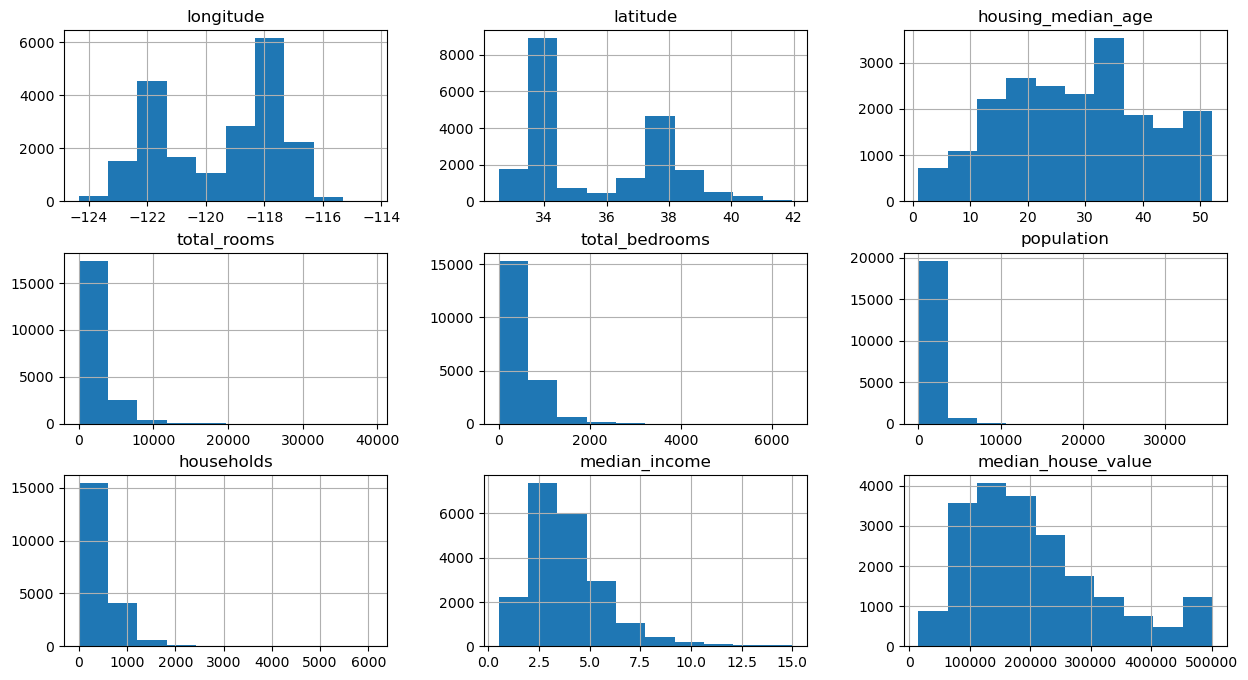

In [14]:
data.hist(figsize=(15,8))

<Axes: >

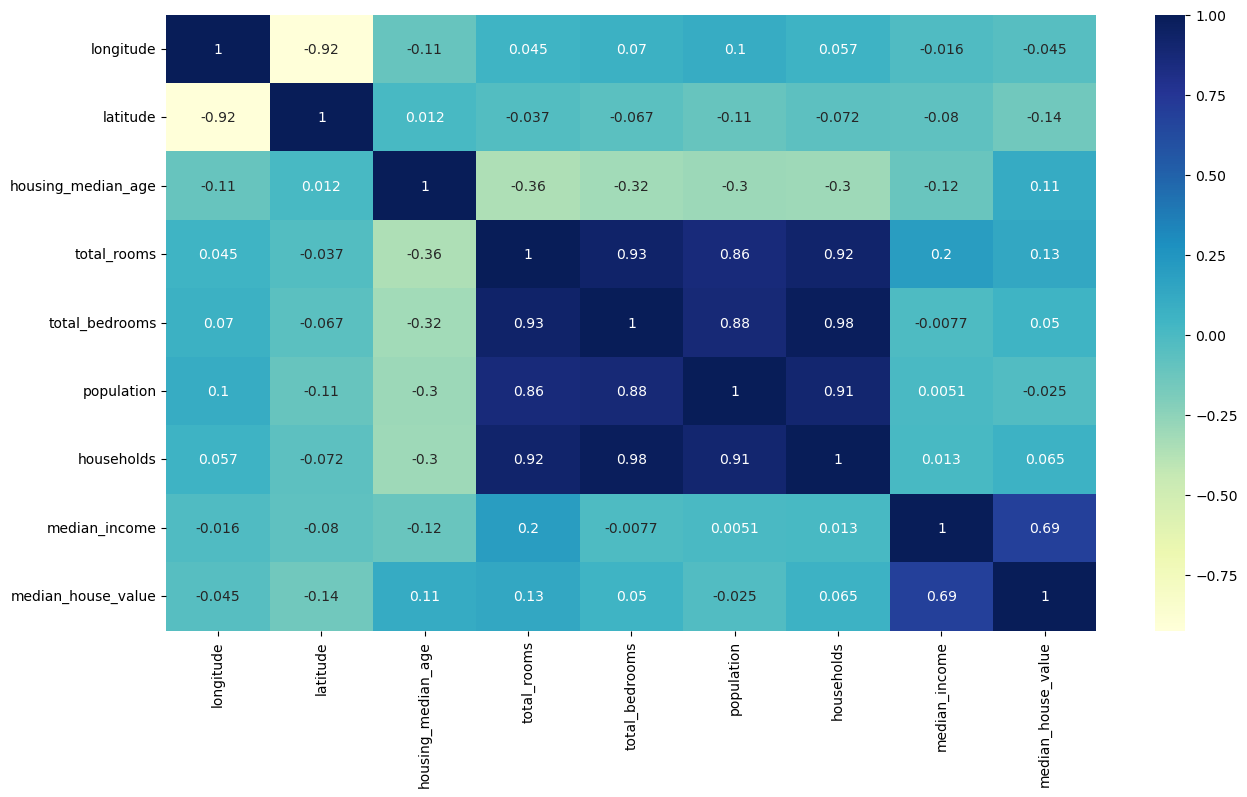

In [16]:
plt.figure(figsize=(15,8))
sns.heatmap(data.corr(numeric_only=True), annot=True, cmap="YlGnBu")

In [18]:
data['total_rooms'] = np.log(data['total_rooms'] + 1)
data['total_bedrooms'] = np.log(data['total_bedrooms'] + 1)
data['population'] = np.log(data['population'] + 1)
data['households'] = np.log(data['households'] + 1)

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

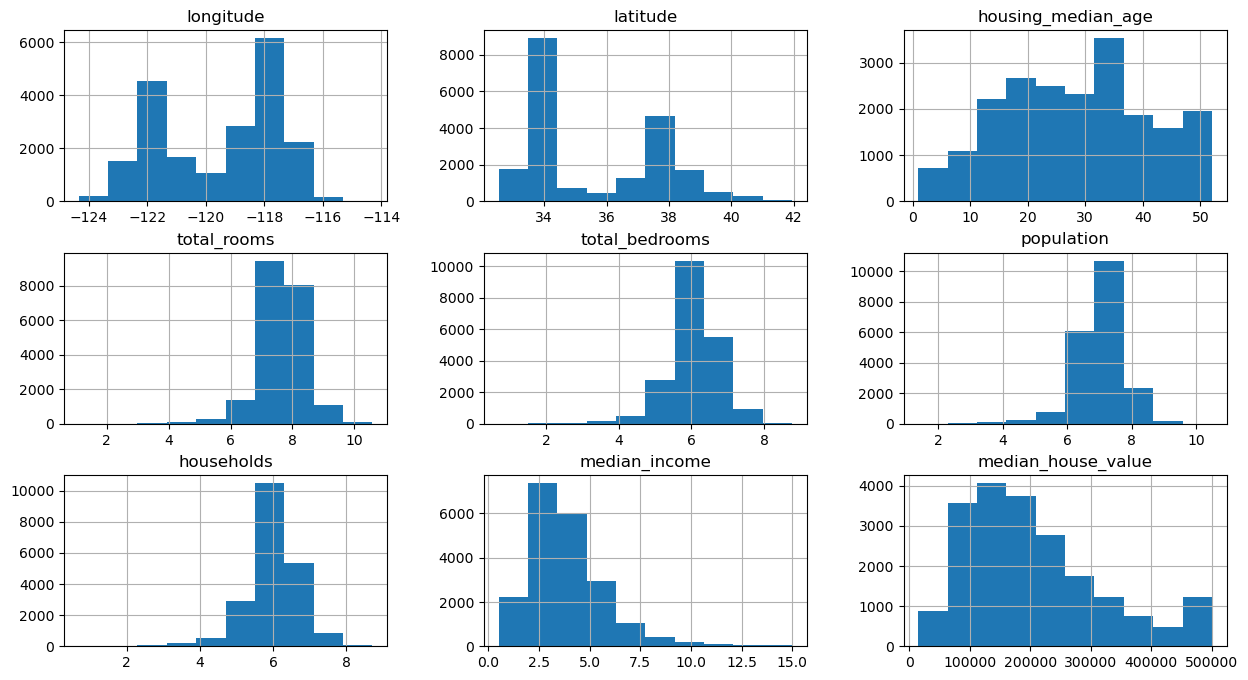

In [20]:
data.hist(figsize=(15,8))

In [22]:
data.ocean_proximity.value_counts()

ocean_proximity
<1H OCEAN     9034
INLAND        6496
NEAR OCEAN    2628
NEAR BAY      2270
ISLAND           5
Name: count, dtype: int64

In [24]:
data = data.join(pd.get_dummies(data.ocean_proximity, dtype=int)).drop(['ocean_proximity'], axis=1)

In [26]:
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41.0,6.781058,4.867534,5.777652,4.844187,8.3252,452600.0,0,0,0,1,0
1,-122.22,37.86,21.0,8.867850,7.009409,7.784057,7.037906,8.3014,358500.0,0,0,0,1,0
2,-122.24,37.85,52.0,7.291656,5.252273,6.208590,5.181784,7.2574,352100.0,0,0,0,1,0
3,-122.25,37.85,52.0,7.150701,5.463832,6.326149,5.393628,5.6431,341300.0,0,0,0,1,0
4,-122.25,37.85,52.0,7.395108,5.638355,6.338594,5.560682,3.8462,342200.0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,7.418181,5.926926,6.740519,5.802118,1.5603,78100.0,0,1,0,0,0
20636,-121.21,39.49,18.0,6.548219,5.017280,5.877736,4.744932,2.5568,77100.0,0,1,0,0,0
20637,-121.22,39.43,17.0,7.720905,6.186209,6.915723,6.073045,1.7000,92300.0,0,1,0,0,0
20638,-121.32,39.43,18.0,7.528869,6.016157,6.609349,5.857933,1.8672,84700.0,0,1,0,0,0


<Axes: >

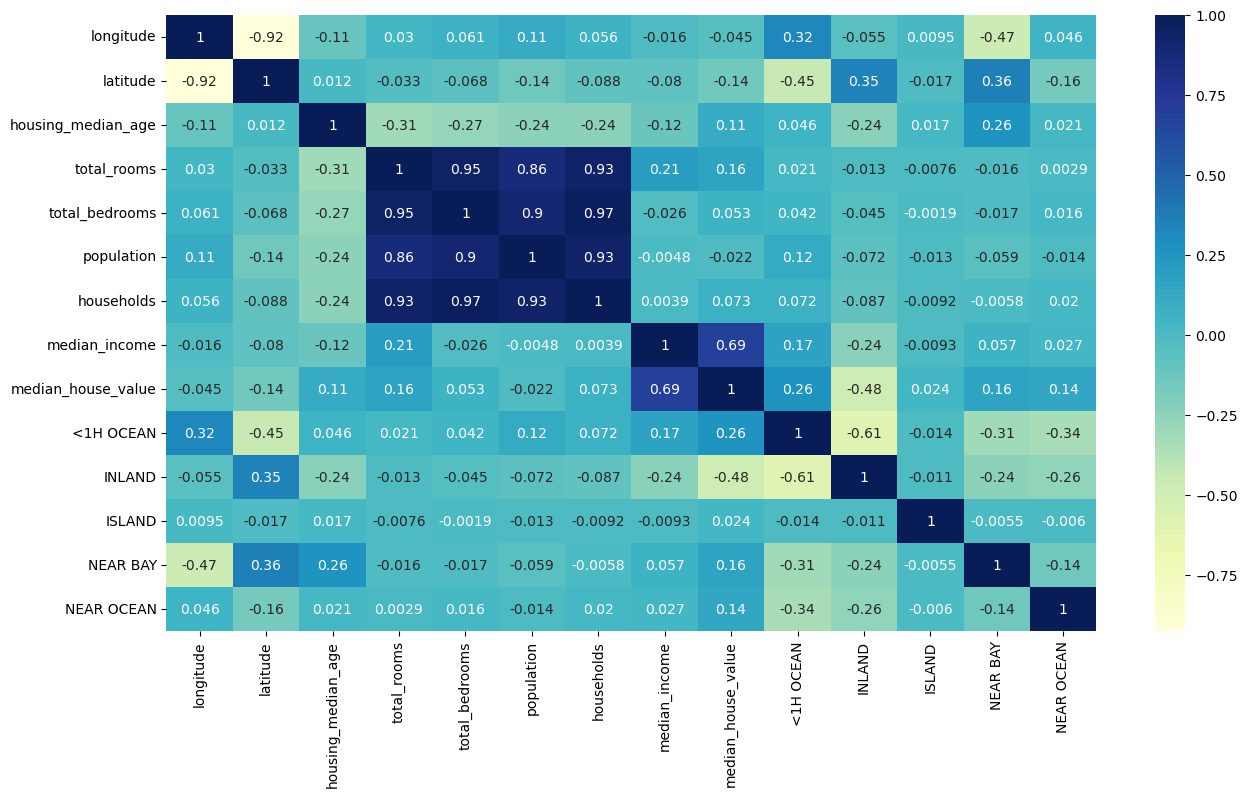

In [28]:
plt.figure(figsize=(15,8))
sns.heatmap(data.corr(numeric_only=True), annot=True, cmap="YlGnBu")

<Axes: xlabel='latitude', ylabel='longitude'>

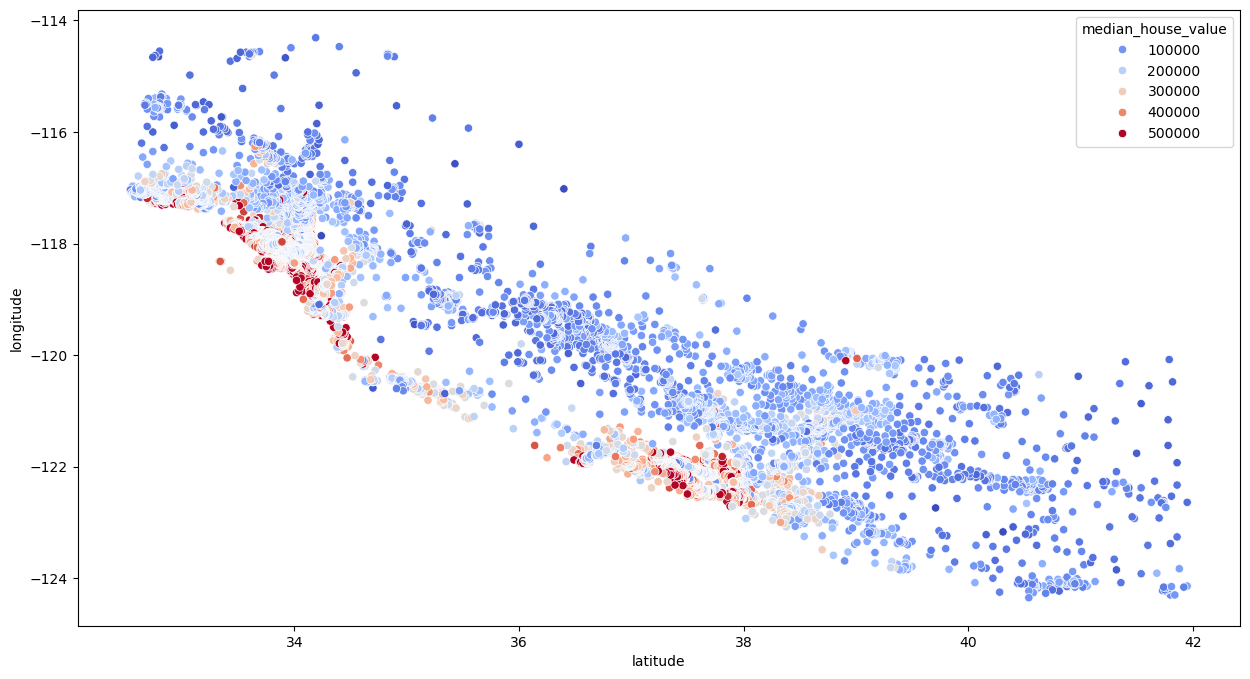

In [30]:
plt.figure(figsize=(15, 8))
sns.scatterplot(x="latitude", y="longitude", data=data, hue="median_house_value", palette="coolwarm")

In [32]:
data['bedroom_ratio'] = data['total_bedrooms'] / data['total_rooms']
data['household_rooms'] = data['total_rooms'] / data['households']

<Axes: >

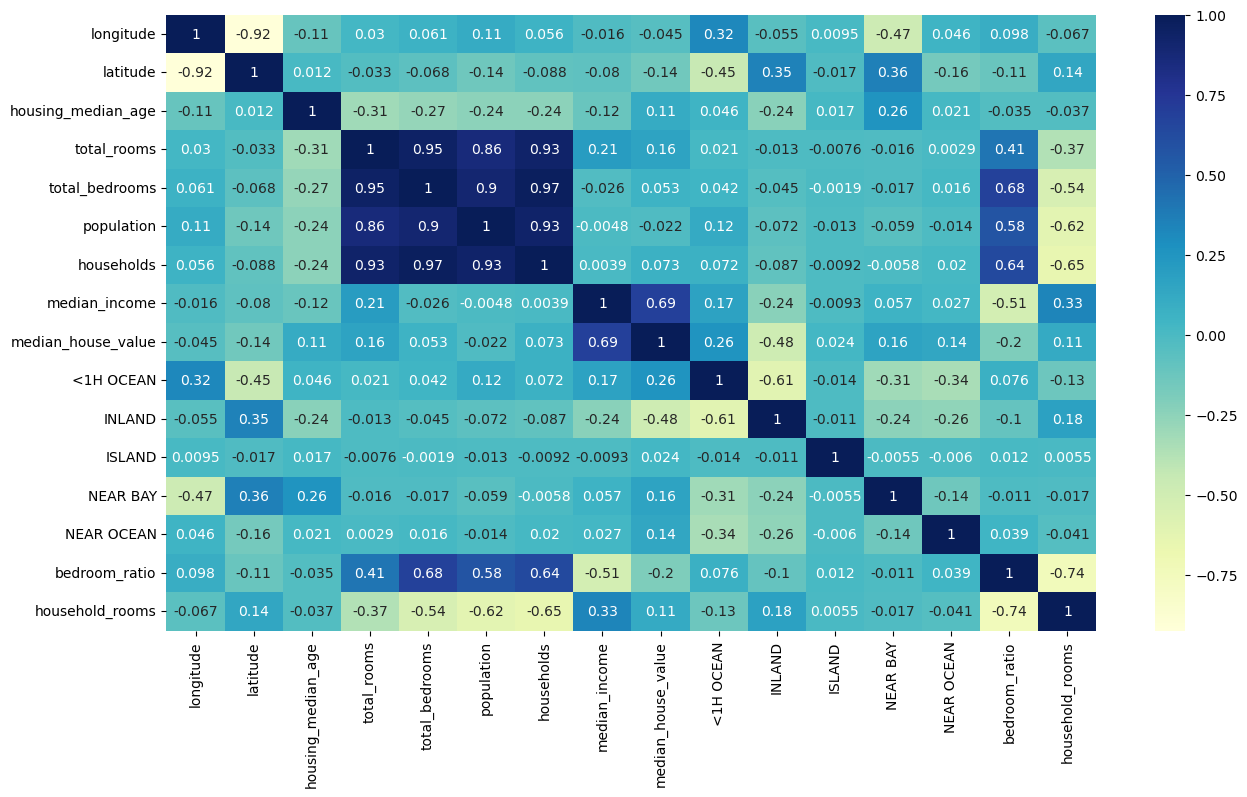

In [34]:
plt.figure(figsize=(15,8))
sns.heatmap(data.corr(numeric_only=True), annot=True, cmap="YlGnBu")

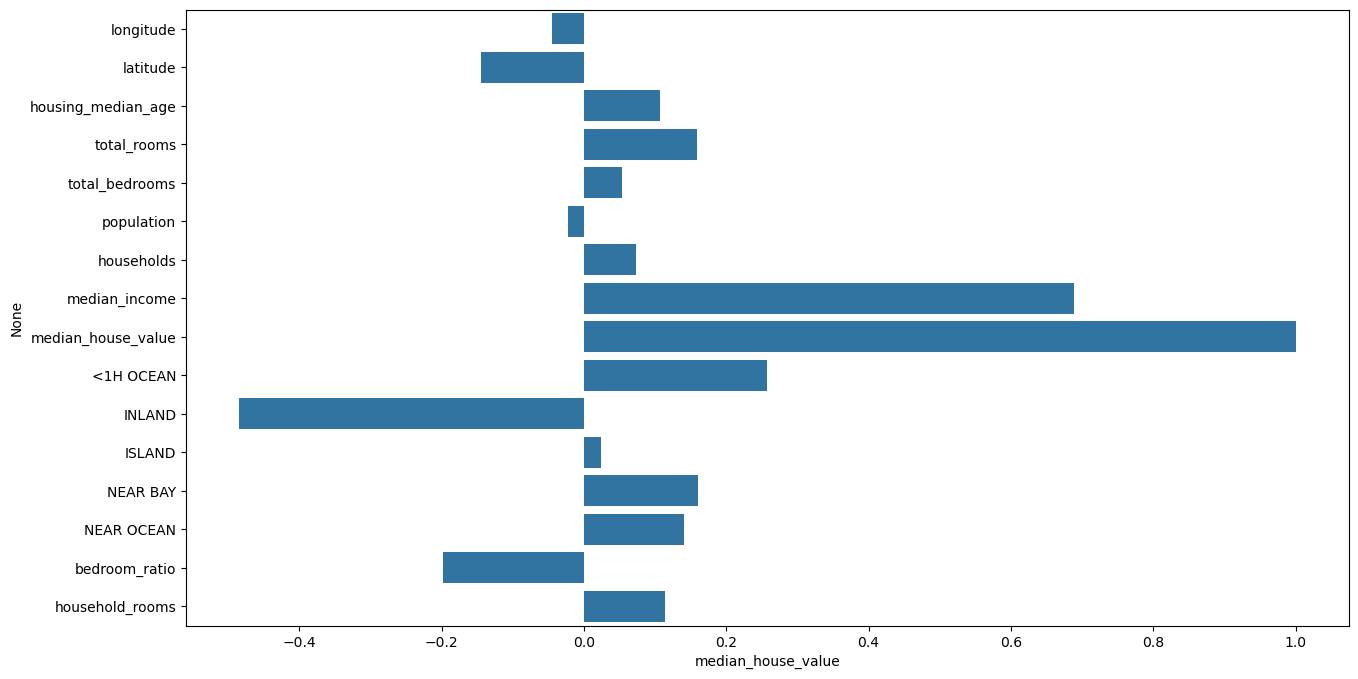

In [36]:
df_corr = data.corr()['median_house_value']

plt.figure(figsize=(15,8))
sns.barplot(x=df_corr, y=df_corr.index)
plt.show()

In [38]:
from sklearn.model_selection import train_test_split

X = data.drop(['median_house_value'], axis=1)
y = data['median_house_value']

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [42]:
train_data = X_train.join(y_train)

In [44]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,bedroom_ratio,household_rooms,median_house_value
6039,-117.73,34.07,33.0,6.933423,5.568345,6.751101,5.598422,2.2596,0,1,0,0,0,0.803116,1.238460,119400.0
13246,-117.63,34.12,4.0,8.371936,6.654153,7.299797,6.498282,6.0758,0,1,0,0,0,0.794816,1.288331,226800.0
2549,-124.17,40.79,43.0,7.734559,6.173786,7.064759,6.180017,1.9688,0,0,0,0,1,0.798208,1.251543,70500.0
11510,-118.10,33.74,31.0,7.178545,5.837730,6.335054,5.739793,4.6528,0,0,0,0,1,0.813219,1.250663,457100.0
5273,-118.53,34.04,45.0,7.445418,5.579730,6.601230,5.568345,9.1078,1,0,0,0,0,0.749418,1.337097,500001.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18158,-122.04,37.37,23.0,8.544030,6.815640,7.763021,6.761573,5.2319,1,0,0,0,0,0.797708,1.263616,430100.0
8440,-118.36,33.91,41.0,7.625107,6.086775,7.083388,6.063785,3.8000,1,0,0,0,0,0.798254,1.257483,222500.0
2910,-119.04,35.36,36.0,7.571988,6.028279,6.958448,6.021023,1.8362,0,1,0,0,0,0.796129,1.257592,66900.0
12026,-117.48,33.94,19.0,7.545390,6.144186,7.434848,6.033086,2.7813,0,1,0,0,0,0.814297,1.250668,112900.0


In [46]:
test_data = X_test.join(y_test)

In [48]:
test_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,bedroom_ratio,household_rooms,median_house_value
14645,-117.19,32.77,30.0,7.918629,6.463029,8.066521,6.489205,3.7650,0,0,0,0,1,0.816180,1.220277,238000.0
5538,-118.43,33.97,16.0,4.262680,2.079442,2.890372,1.609438,7.7197,1,0,0,0,0,0.487825,2.648552,500001.0
9132,-118.01,34.55,2.0,7.901748,6.274762,7.221836,6.066108,4.0710,0,1,0,0,0,0.794098,1.302606,137400.0
14479,-117.24,32.83,18.0,8.042378,6.218600,6.856462,5.910797,7.4351,0,0,0,0,1,0.773229,1.360625,445700.0
10201,-117.94,33.88,35.0,7.435438,5.693732,6.522093,5.645447,4.3333,1,0,0,0,0,0.765756,1.317068,239300.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13082,-121.37,38.57,16.0,8.267706,6.799056,7.474772,6.752270,2.6635,0,1,0,0,0,0.822363,1.224433,135800.0
7828,-118.14,33.91,32.0,7.591862,6.159095,7.224025,6.068426,3.1204,1,0,0,0,0,0.811276,1.251043,204200.0
3502,-118.44,34.27,36.0,7.013915,5.620401,7.195937,5.587249,3.5347,1,0,0,0,0,0.801321,1.255343,158100.0
10376,-117.62,33.64,2.0,8.965335,6.795706,8.001690,6.673298,10.1531,1,0,0,0,0,0.757998,1.343464,484100.0


In [50]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)

reg = LinearRegression()

reg.fit(X_train_s, y_train)

LinearRegression()

In [52]:
X_test_s = scaler.fit_transform(X_test)

In [54]:
y_pred1 = reg.predict(X_test_s)

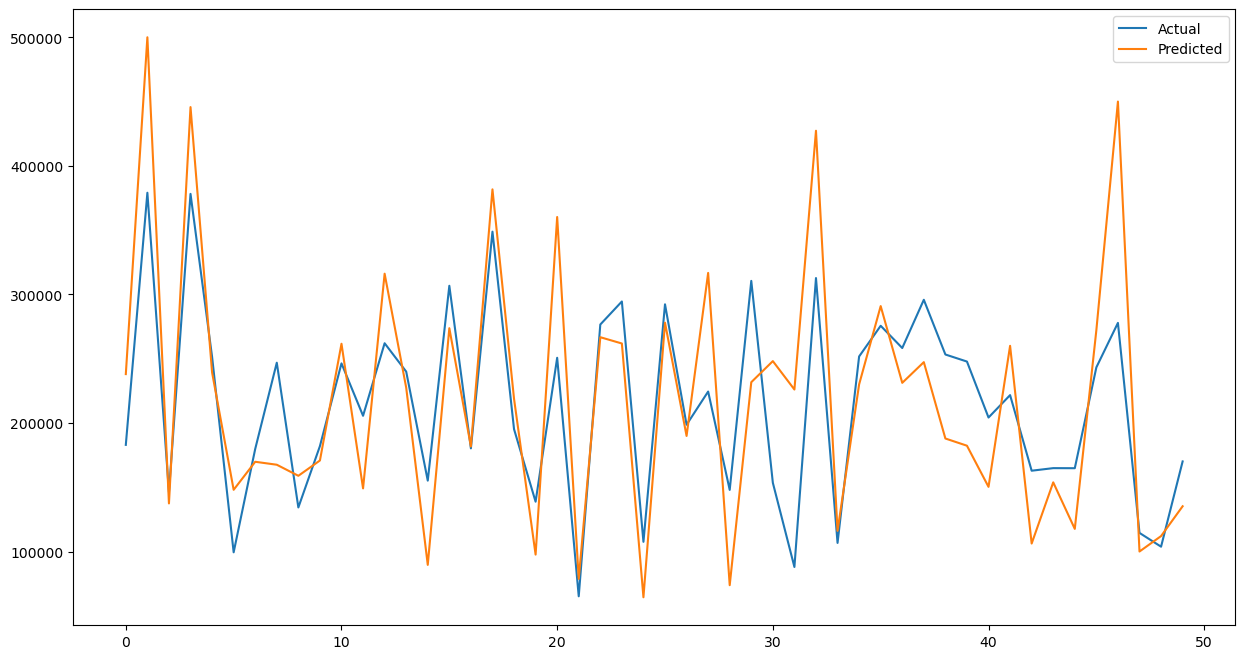

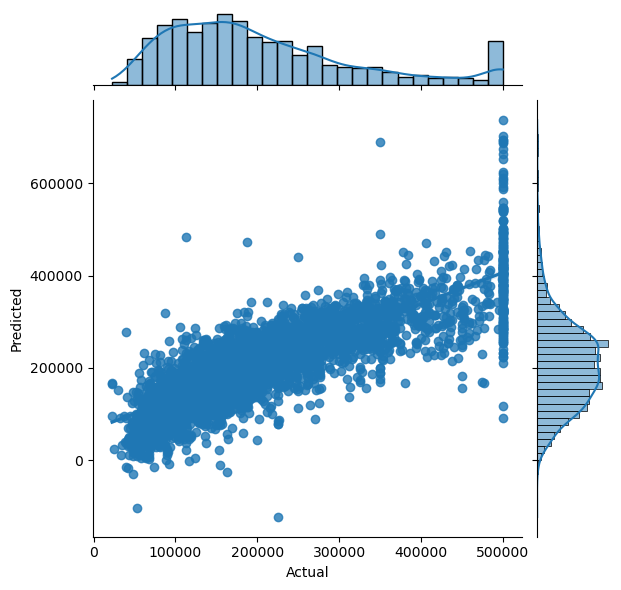

In [56]:
test = pd.DataFrame({'Predicted':y_pred1,'Actual':y_test})
fig = plt.figure(figsize=(15,8))
test = test.reset_index()
test = test.drop(['index'], axis=1)
plt.plot(test[:50])
plt.legend(['Actual', 'Predicted'])
sns.jointplot(x='Actual', y='Predicted', data=test, kind='reg',);

In [60]:
reg_mse = np.sqrt(metrics.mean_squared_error(y_test, y_pred1))
reg_pre_mse = np.sqrt(metrics.mean_squared_error(y_train, reg.predict(X_train_s)))

In [62]:
reg_score = reg.score(X_test_s, y_test)
reg_score

0.6890964635791761

In [64]:
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor()

forest.fit(X_train_s, y_train)

RandomForestRegressor()

In [66]:
y_pred2 = forest.predict(X_test_s)

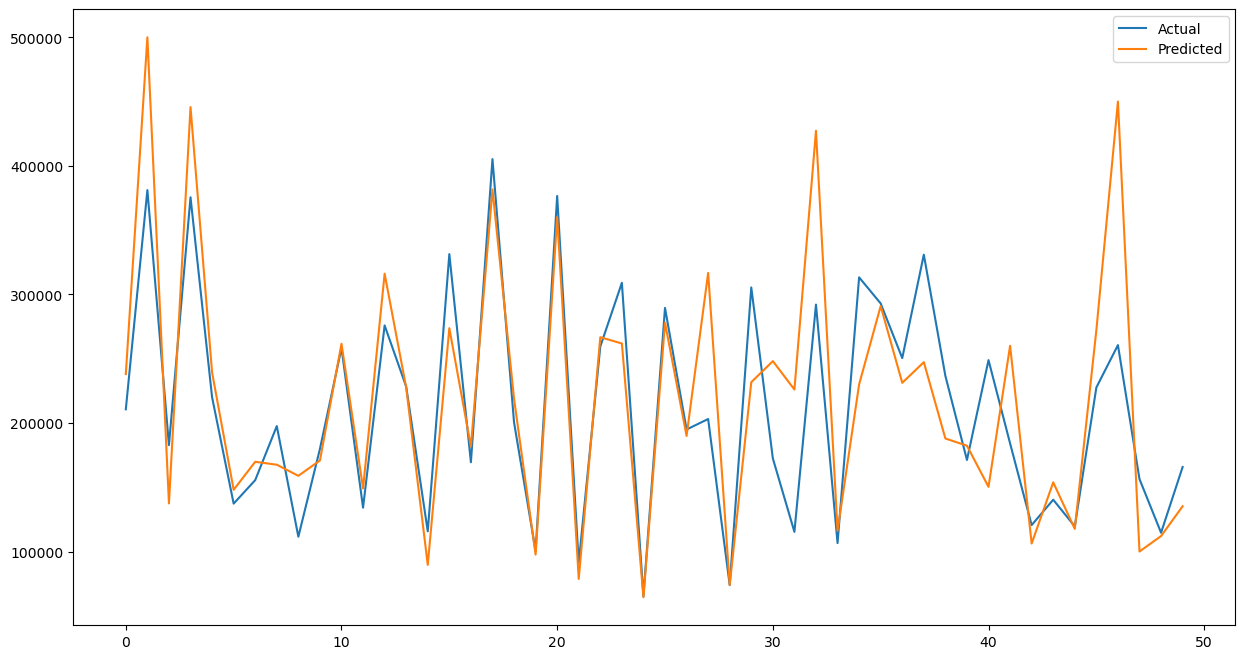

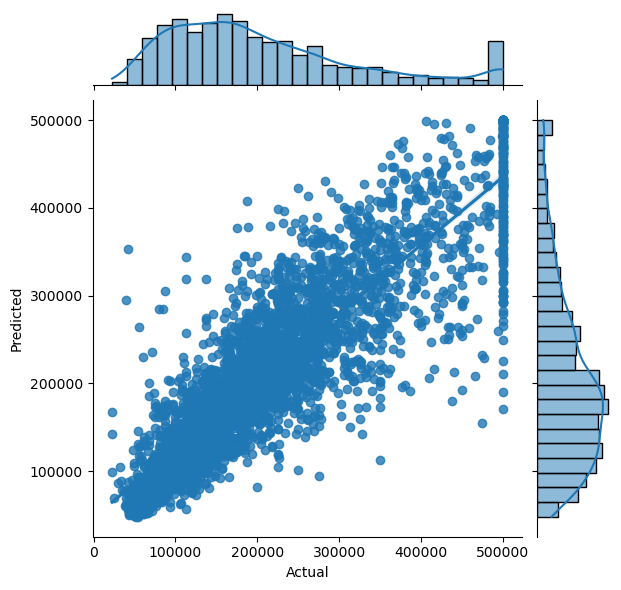

In [68]:
test2 = pd.DataFrame({'Predicted':y_pred2, 'Actual':y_test})
fig = plt.figure(figsize=(15,8))
test2 = test2.reset_index()
test2 = test2.drop(['index'],axis=1)
plt.plot(test2[:50])
plt.legend(['Actual','Predicted'])
sns.jointplot(x='Actual', y='Predicted', data=test2, kind="reg")

In [70]:
forest_mse = np.sqrt(metrics.mean_squared_error(y_test,y_pred2))

In [72]:
forest_score = forest.score(X_test_s, y_test)
forest_score

0.786898951738692

In [74]:
from sklearn.model_selection import GridSearchCV

forest = RandomForestRegressor()

param_grid = {
    "n_estimators": [100, 200, 300],
    "min_samples_split": [2, 4, 6],
    "max_depth": [None, 4, 8]
}

grid_search = GridSearchCV(forest, param_grid, cv=5,
                            scoring="neg_mean_squared_error",
                            return_train_score=True,
                            n_jobs=-1)

grid_search.fit(X_train_s, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [None, 4, 8],
                         'min_samples_split': [2, 4, 6],
                         'n_estimators': [100, 200, 300]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [76]:
best_forest = grid_search.best_estimator_

In [78]:
best_forest

RandomForestRegressor(min_samples_split=4, n_estimators=300)

In [80]:
bf_score = best_forest.score(X_test_s, y_test)
bf_score

0.7889793097906306

In [82]:
y_pred3 = grid_search.predict(X_test_s)

In [84]:
bf_mse = np.sqrt(metrics.mean_squared_error(y_test,y_pred3))

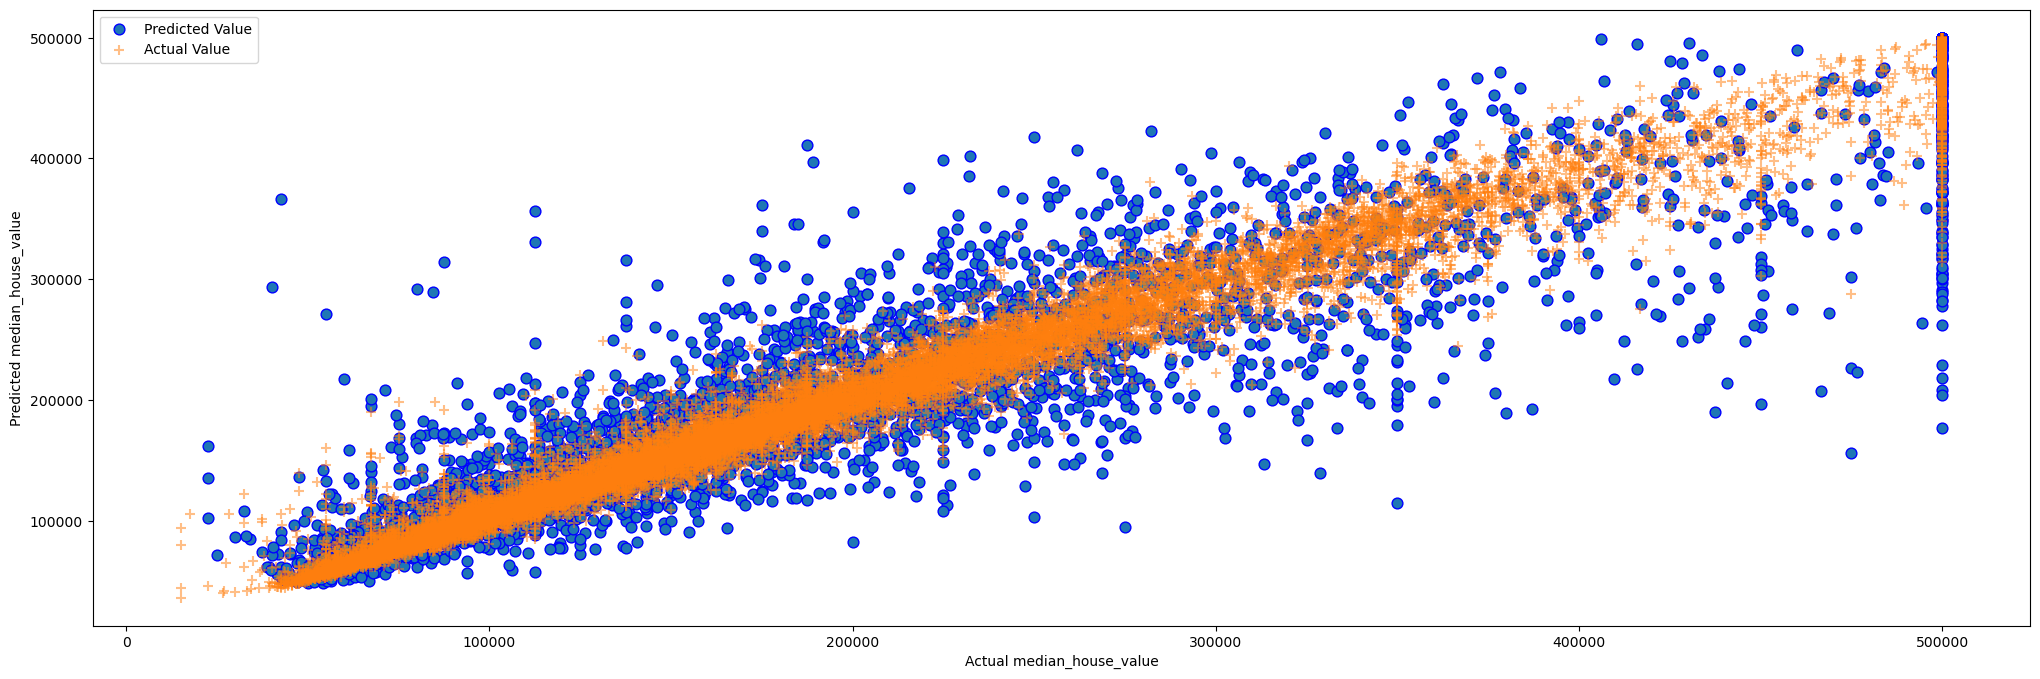

In [86]:
fig = plt.figure(figsize=(25, 8))
plt.scatter(y_test, y_pred3, marker="o", edgecolors="b", s=60, label="Predicted Value")
plt.scatter(y_train, grid_search.predict(X_train_s), marker="+", s=50, alpha=0.5, label="Actual Value")
plt.xlabel("Actual median_house_value")
plt.ylabel("Predicted median_house_value")
plt.legend()

In [88]:
models = ["Linear","Random Forest", "Random Forest (with hyperparameter)"]
rows = [[reg_score,reg_mse],[forest_score,forest_mse],[bf_score,bf_mse]]
cols = ['r2_score','RMSE']
pd.DataFrame(data = rows , columns=cols , index = models).sort_values(ascending=False , by=["r2_score"])

,r2_score,RMSE
Random Forest (with hyperparameter),0.788979,53698.477939
Random Forest,0.786899,53962.523328
Linear,0.689096,65179.689520
